# Matthew Joel
# Conditional Probability

---


# Smoking and Birth Weight

---

The R package `MASS` contains a data set `birthwt` with data from a study on various risk factors associated with low infant birth weights. Let's analyze and consider whether there is any relation between smoking during pregnancy and infant birth weight. The variables we will analyze are:

- The smoking status of the pregnant parent.
  - `smoke` 0 means non-smoker.
  - `smoke` 1 means smoker.
- Whether the infant has a low birth weight (less than 2.5 kg).
  - `low` 0 means not a low birth weight.
  - `low` 1 means did have low birth weight.





In [1]:
library(MASS)
risk <- subset(birthwt, select = c(low, smoke))  # extract only low and smoke variables

risk$low[risk$low == "0"]  <- "Not low"  #This replaces 0 values with Not Low categorical
risk$low[risk$low == "1"]  <- "Low"  #replace 1 wih Low
risk$smoke[risk$smoke == "0"]  <- "Non-smoker"  #change boolean 0 to non-smoker
risk$smoke[risk$smoke == "1"]  <- "Smoker"  #change 1's to smoker

risk$low <- factor(risk$low)  #Now finally convert the column to categorical
risk$smoke <- factor(risk$smoke)  #smoke column is now categorical


Let's find out:

- How many total observations are in the data set `risk`?
- In how many pregnancies did the parent smoke?
- In how many pregnancies did the infant have a low birth weight (below 2.5 kg)?


<br>  



In [2]:
summary(risk)

      low             smoke    
 Low    : 59   Non-smoker:115  
 Not low:130   Smoker    : 74  

---

- Total number of observations: 189

- Total number of smokers: 74

- Total number of low birth weights: 59

<br>

Now we need to find the probabilities of the variables:
---
- Let $L$ denote the event a randomly selected infant from the study has a low birth weight (less than 2.5 kg).
- Let $L'$ denote the event a randomly selected infant in the study does not have low birth weight.

- Let $S$ denote the event a randomly selected infant from the study had a parent that smoked during pregnancy.
- Let $S'$ denote the event a randomly selected infant from the study had a parent that did not smoke during pregnancy.

If we randomly select an infant from the sample stored in `risk`:

<br>

(i) $P(L) = 0.3121693$

Interpretation (i): 31.2% chance a randomly selected infant has low birth weight.


<br>  

(ii) $P(S) = 0.3915344$

Interpretation (ii): 39.2% chance a randomly selected infant had a parent that smoked during pregnancy.


<br>  

(iii) $P(S \cup L) = 0.5449735$

Interpretation (iii): 54.5% chance a randomly selected infant is from smoker parent or has low birth weight.


<br>  

(iv) $P(S \cap L) = 0.1587302 $

Interpretation (iv): 15.9% chance a random infant has smoker parent and has low birth weight.


<br>  
<br>  



In [3]:
smoke_table <- table(risk$smoke)
prop.table(smoke_table)
low_table <- table(risk$low)
prop.table(low_table)
smoke_low_table <- table(risk$smoke, risk$low)
prop.table(smoke_low_table)

#iii
0.3915344 + 0.3121693 - 0.1587302


Non-smoker     Smoker 
 0.6084656  0.3915344 


      Low   Not low 
0.3121693 0.6878307 

            
                   Low   Not low
  Non-smoker 0.1534392 0.4550265
  Smoker     0.1587302 0.2328042

[1] 0.5449735


## Conditional

---

Given the infant had a low birth weight, what is the probability the infant had a parent that smoked during their pregnancy?
---

<br>

$$P( S | L ) = 50.85\%  \\ P(S|L) = \frac{P(S \cap L)}{P(L)} $$


<br>

In [4]:
prop.table(smoke_low_table)
0.1587302 / (0.1587302+ 0.1534392)

            
                   Low   Not low
  Non-smoker 0.1534392 0.4550265
  Smoker     0.1587302 0.2328042

[1] 0.5084746

---

Given a parent smoked during their pregnancy, what is the probability that their infant was low birth weight?


$$P( L | S ) = 40.5\%  \\ P(L|S) = \frac{P(L \cap S)}{P(S)} $$


<br>

In [5]:
prop.table(smoke_low_table)
0.1587302 / (0.1587302+ 0.2328042)

            
                   Low   Not low
  Non-smoker 0.1534392 0.4550265
  Smoker     0.1587302 0.2328042

[1] 0.4054055

## Analysis

---

But these conditional probabilities on their own aren't enough. We need one additional, relevant conditional probability we can compare with the previous probability to help determine whether there is an increased risk in a low birth weight if a parent smokes during pregnancy. This would be:

<br>
$$P( L | S' ) = 25.2\%  \\ P(L|S') = \frac{P(L \cap S')}{P(S')} $$
<br>

Thus, I believe this study does show smoking affects birth weight. P(L | S), meaning low birth weight given smoker, is 40%. P(L | S'), meaning low birth weight given non-smoker, is 25%. Using these conditional probabilities, we can see that given the smoker status of parent, we can expect a change in birthweight.
<br>  


In [6]:
0.1534392 /(0.1534392+ 0.4550265)

[1] 0.252174


## Plotting the Data

---

Let's create a stacked bar chart to clearly display the conditional probabilities we compared.

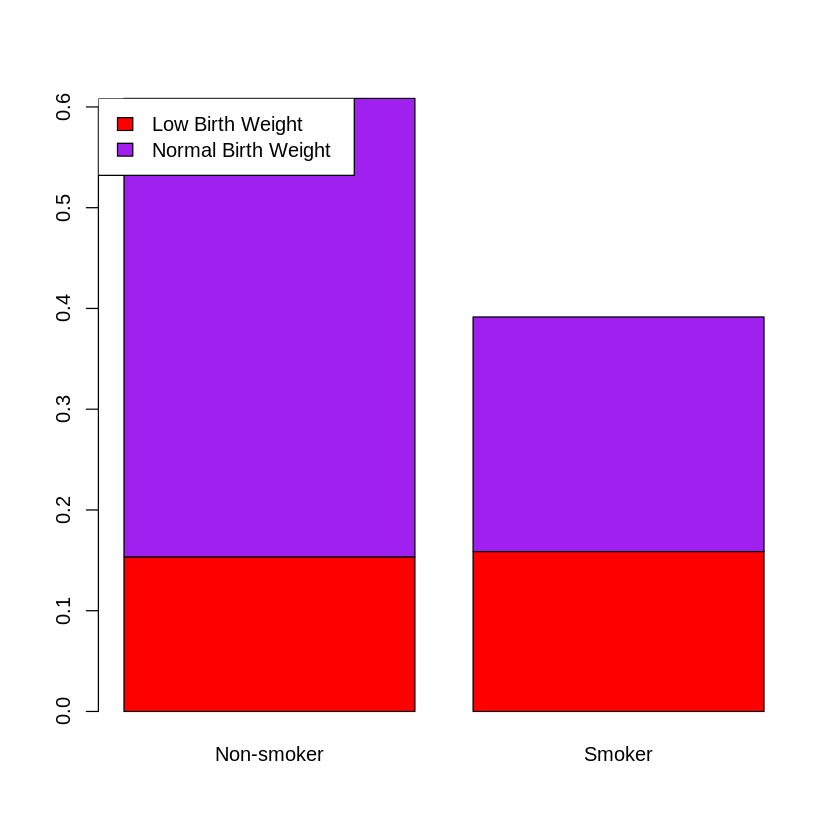

In [7]:
low_smoke_table <- table(risk$low, risk$smoke)


my.colors <- c("red", "purple","blue")

barplot(prop.table(low_smoke_table),col = my.colors)
legend(x="topleft",
       legend = c("Low Birth Weight", "Normal Birth Weight"),
       fill = my.colors
       )



# Alzheimer's Test Accuracy

---

Most medical screening tests are not perfectly accurate. The accuracy is typically measured using two conditional probabilities:

-   The <font color="tomato">sensitivity</font> of the test is the probability that a person with the disease correctly receives a positive test. This is a <font color="tomato">Correct Positive</font>.

$$\color{tomato}{\mbox{Sensitivity} = P\left( + \mbox{ Test } \big| \mbox{ Has Disease} \right)}$$

-   The <font color="dodgerblue">specificity</font> of the test is the probability that a person without the disease correctly receives a negative test. This is a <font color="dodgerblue">Correct Negative</font>.

$$\color{dodgerblue}{\mbox{Specificity} = P( - \mbox{ Test } \big| \mbox{ No Disease})}$$

We will be focusing on the Mini Mental State Examination (MMSE), which is the most commonly used test for complaints of problems with memory or other mental abilities<sup>1</sup>.

-   <font color="tomato">The sensitivity of the MMSE is 80%, $P\left( + \mbox{ Test } \big| \mbox{ Has Disease} \right) = 0.8$</font>.
-   <font color="dodgerblue">The specificity of the MMSE is 90%, $P\left( - \mbox{ Test } \big| \mbox{ No Disease} \right) = 0.9$</font>.

Approximately 10% of Americans over the age of 65 suffer from Alzheimer's dementia<sup>2</sup>.

<br>

<font size="2">1. Alzheimer's Society: [Tests and scans used to diagnose dementia](https://www.alzheimers.org.uk/about-dementia/symptoms-and-diagnosis/diagnosis/mmse-test).</font>

<font size="2">2. Alzheimer's Association: [Alzheimer's Disease Facts and Figures](https://www.alz.org/alzheimers-dementia/facts-figures).</font>

<br>

---

<br>


Lets start with the table below to help. For example, if 1000 Americans over the age of 65 are randomly screened by the MMSE for Alzheimer's dementia, then we have:

<br>  


|        | Has Alzheimer's | Does Not Have Alzheimer's | Total |
|--------|-----------------|---------------------------|-------|
| Test + | 80              | 90                        | 170    |
| Test - | 20              | 810                        | 830    |
| Total  | 100             | 900                       | 1,000 |






Thus the probability that a randomly tested adult over the age of 65 will test positive is 17%

In [8]:
170/1000

[1] 0.17

## Conditional

---
For this case study, there is one conditonal probability that we are most interested in. That is: given that a patient tests positive for Alzheimer's, what is the probability they actually have Alzheimer's?



P(Alz | Test+)  = P(Alz ∩ Test+)/ P(Test+)

<br>  
0.470588235294118
<br>  

In [9]:
(80/1000)/(170/1000)

[1] 0.4705882